In [1]:
# Import modules to be used

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# save the csv files and their paths

nba_stats_path = "Datasets/NBA Player Stats.csv"
wnba_stats_path = "Datasets/WNBA Player Stats.csv"
nba_team_stats_path = "Datasets/NBA Team Stats.csv"
wnba_team_stats_path = "Datasets/WNBA Team Stats.csv"

In [3]:
# convert paths to readable python dataframes

nba_stats = pd.read_csv(nba_stats_path)
wnba_stats = pd.read_csv(wnba_stats_path, encoding='latin-1')
nba_team_stats = pd.read_csv(nba_team_stats_path)
wnba_team_stats = pd.read_csv(wnba_team_stats_path)

In [4]:
nba_stats.head()

,Year,Teams,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Hawks,Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,4.3,9.3,4.8,1.1
1,2019-20,Atlanta Hawks,Deandre Hunter,63,32.0,12.3,4.4,10.8,41.0,1.7,4.8,35.5,1.7,2.3,76.4,4.5,1.8,1.6,0.7
2,2019-20,Atlanta Hawks,John Collins,41,33.2,21.6,8.6,14.8,58.3,1.4,3.6,40.1,2.9,3.7,80.0,10.1,1.5,1.8,0.8
3,2019-20,Atlanta Hawks,Cam Reddish,58,26.7,10.5,3.7,9.6,38.4,1.4,4.3,33.2,1.7,2.2,80.2,3.7,1.5,1.7,1.1
4,2019-20,Atlanta Hawks,Alex Len,40,18.6,8.7,3.6,6.5,54.6,0.4,1.4,25.0,1.3,2.0,63.0,5.8,1.1,1.0,0.5


In [5]:
nba_team_stats.head()

,Season,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Hawks,67,48.6,111.8,40.6,90.6,44.9,12.0,36.1,33.3,18.5,23.4,79.0,43.3,24.0,16.2,7.8
1,2019-20,Chicago Bulls,65,48.2,106.8,39.6,88.6,44.7,12.2,35.1,34.8,15.5,20.5,75.5,41.9,23.2,15.5,10.0
2,2019-20,Dallas Mavericks,75,48.5,117.0,41.7,90.3,46.1,15.1,41.3,36.7,18.6,23.8,77.9,46.9,24.7,12.7,6.1
3,2019-20,Golden State Warriors,65,48.4,106.3,38.6,88.2,43.8,10.4,31.3,33.4,18.7,23.2,80.3,42.8,25.6,14.9,8.2
4,2019-20,Indiana Pacers,73,48.3,109.4,42.1,88.5,47.6,10.2,28.0,36.3,15.0,19.1,78.7,42.8,25.9,13.2,7.4


In [6]:
wnba_team_stats.head()

,Season,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Dream,34,40.1,71.2,25.6,69.2,37.1,6.4,22.0,29.0,13.5,18.0,75.2,36.1,15.7,14.4,6.6
1,2019-20,Chicago Sky,34,40.1,84.6,31.4,70.0,44.8,7.3,21.6,33.6,14.6,17.9,81.9,36.4,21.6,15.3,6.8
2,2019-20,Dallas Wings,34,40.0,71.6,25.9,66.6,38.9,6.4,19.5,32.6,13.5,16.6,81.1,33.9,15.2,14.6,7.3
3,2019-20,Indiana Fever,34,40.3,77.6,29.0,68.6,42.2,5.8,16.7,34.6,13.9,17.4,79.4,35.1,17.3,13.9,6.3
4,2019-20,Los Angeles Sparks,34,40.1,80.1,30.3,70.2,43.2,7.1,20.9,34.1,12.3,14.7,83.8,34.2,18.6,14.4,8.2


In [7]:
wnba_stats.head()

,Year,Team,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Dream,Renee Montgomery,34,27.9,9.5,3.1,8.5,37.0,2.0,6.2,32.4,1.2,1.5,82.4,2.2,2.6,1.9,0.9
1,2019-20,Atlanta Dream,Tiffany Hayes,29,28.2,14.7,5.1,12.9,39.3,1.2,4.0,30.8,3.3,4.4,76.4,3.0,2.8,2.4,1.0
2,2019-20,Atlanta Dream,Britney Sykes,34,25.9,10.2,3.8,10.3,36.5,0.8,3.2,25.9,1.9,2.7,70.3,4.4,2.5,2.0,0.6
3,2019-20,Atlanta Dream,Jessica Breland,33,23.2,7.5,3.2,8.3,37.8,0.3,1.2,23.7,0.9,1.0,87.9,7.3,1.7,1.2,1.3
4,2019-20,Atlanta Dream,Elizabeth Williams,32,28.4,9.3,3.3,7.3,45.5,0.0,0.0,0.0,2.6,3.5,73.2,6.5,1.2,1.3,0.8


In [8]:
m_stats_19_20 = nba_stats[nba_stats["Year"] == "2019-20"]
w_stats_19_20 = wnba_stats[wnba_stats["Year"] == "2019-20"]

In [9]:
m_stats_19_20.head()

,Year,Teams,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Hawks,Trae Young,60,35.3,29.6,9.1,20.8,43.7,3.4,9.5,36.1,8.0,9.3,86.0,4.3,9.3,4.8,1.1
1,2019-20,Atlanta Hawks,Deandre Hunter,63,32.0,12.3,4.4,10.8,41.0,1.7,4.8,35.5,1.7,2.3,76.4,4.5,1.8,1.6,0.7
2,2019-20,Atlanta Hawks,John Collins,41,33.2,21.6,8.6,14.8,58.3,1.4,3.6,40.1,2.9,3.7,80.0,10.1,1.5,1.8,0.8
3,2019-20,Atlanta Hawks,Cam Reddish,58,26.7,10.5,3.7,9.6,38.4,1.4,4.3,33.2,1.7,2.2,80.2,3.7,1.5,1.7,1.1
4,2019-20,Atlanta Hawks,Alex Len,40,18.6,8.7,3.6,6.5,54.6,0.4,1.4,25.0,1.3,2.0,63.0,5.8,1.1,1.0,0.5


In [10]:
mp = m_stats_19_20.groupby(["Teams", "Player"])["PTS"].max()

In [11]:
mp = mp.groupby(level=0 , group_keys=False).nlargest(1).reset_index()

In [12]:
mp

,Teams,Player,PTS
0,Atlanta Hawks,Trae Young,29.6
1,Chicago Bulls,Zach Lavine,25.5
2,Dallas Mavericks,Luka Doncic,28.8
3,Golden State Warriors,D'Angelo Russell,23.6
4,Indiana Pacers,T.J. Warren,19.8
5,Los Angeles Lakers,Anthony Davis,26.1
6,Minnesota Timberwolves,Karl-Anthony Towns,26.5
7,New York Knicks,Marcus Morris Sr.,19.6
8,Oklahoma City Thunder,Shai Gilgeous-Alexander,19.0
9,Phoenix Suns,Devin Booker,26.6


In [13]:
wp = w_stats_19_20.groupby(["Team", "Player"])["PTS"].max()

In [14]:
wp = wp.groupby(level = 0, group_keys = False).nlargest(1).reset_index()

In [15]:
wp

,Team,Player,PTS
0,Atlanta Dream,Tiffany Hayes,14.7
1,Chicago Sky,Diamond Deshields,16.2
2,Dallas Wings,Arike Ogunbowale,19.1
3,Indiana Fever,Kelsey Mitchell,13.6
4,Las Vegas Aces,A'Ja Wilson,16.5
5,Los Angeles Sparks,Nneka Ogwumike,16.1
6,Minnesota Lynx,Odyssey Sims,14.5
7,New York Liberty,Tina Charles,16.9
8,Phoenix Mercury,Brittney Griner,20.7
9,Seattle Storm,Natasha Howard,18.1


In [16]:
x_axis = mp["Player"]
y_axis = mp["PTS"]
x_axis2 = wp["Player"]
y_axis2 = wp["PTS"]

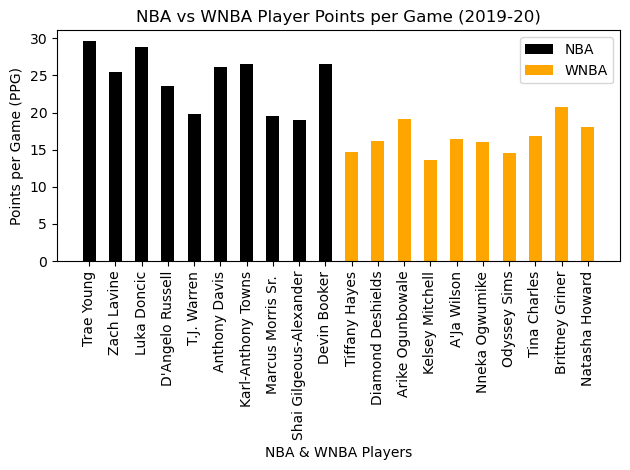

In [75]:
plt.bar(x_axis, y_axis, width = .5, label = "NBA", color = "black")
plt.bar(x_axis2, y_axis2, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Points per Game (PPG)")
plt.title("NBA vs WNBA Player Points per Game (2019-20)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/PPG19-20.png")
plt.tight_layout()
plt.show()

In [18]:
m_stats_20_21 = nba_stats[nba_stats["Year"] == "2020-21"]
w_stats_20_21 = wnba_stats[wnba_stats["Year"] == "2020-21"]

In [19]:
m_stats_20_21.head()

,Year,Teams,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
50,2020-21,Atlanta Hawks,Trae Young,63,33.7,25.3,7.7,17.7,43.8,2.2,6.3,34.3,7.7,8.7,88.6,3.9,9.4,4.1,0.8
51,2020-21,Atlanta Hawks,Deandre Hunter,23,29.5,15.0,5.2,10.8,48.4,1.3,4.1,32.6,3.2,3.7,85.9,4.8,1.9,1.3,0.8
52,2020-21,Atlanta Hawks,John Collins,63,29.3,17.6,6.8,12.2,55.6,1.3,3.3,39.9,2.7,3.2,83.3,7.4,1.2,1.3,0.5
53,2020-21,Atlanta Hawks,Cam Reddish,26,28.9,11.2,3.7,10.1,36.5,1.3,4.8,26.2,2.6,3.2,81.7,4.0,1.3,1.3,1.3
54,2020-21,Atlanta Hawks,Clint Capela,63,30.1,15.2,6.6,11.0,59.4,0.0,0.0,0.0,2.1,3.6,57.3,14.3,0.8,1.2,0.7


In [20]:
w_stats_20_21.head()

,Year,Team,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
50,2020-21,Atlanta Dream,Monique Billings,22,27.1,8.5,3.1,7.7,40.0,0.0,0.0,0.0,2.3,3.0,76.1,8.5,1.2,1.9,1.1
51,2020-21,Atlanta Dream,Chennedy Carter,16,25.4,17.4,6.6,14.0,47.3,0.8,2.0,37.5,3.4,4.2,82.1,2.3,3.4,2.7,0.9
52,2020-21,Atlanta Dream,Betnijah Laney,22,33.3,17.2,6.5,13.5,48.1,1.4,3.4,40.5,2.8,3.4,82.7,4.9,4.0,3.0,1.6
53,2020-21,Atlanta Dream,Shekinna Stricklen,22,21.7,6.1,2.1,6.3,34.1,1.5,4.5,33.3,0.4,0.4,100.0,1.9,0.6,0.7,0.3
54,2020-21,Atlanta Dream,Elizabeth Williams,22,29.2,10.1,4.0,8.1,48.9,0.0,0.0,0.0,2.2,3.0,74.2,5.7,1.4,1.1,0.8


In [21]:
mp2 = m_stats_20_21.groupby(["Teams", "Player"])["PTS"].max()
mp2 = mp2.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
mp2

,Teams,Player,PTS
0,Atlanta Hawks,Trae Young,25.3
1,Chicago Bulls,Zach Lavine,27.4
2,Dallas Mavericks,Luka Doncic,27.7
3,Golden State Warriors,Steph Curry,32.0
4,Indiana Pacers,Malcolm Brogdon,21.2
5,Los Angeles Lakers,Lebron James,25.0
6,Minnesota Timberwolves,Karl-Anthony Towns,24.8
7,New York Knicks,Julius Randle,24.1
8,Oklahoma City Thunder,Shai Gilgeous-Alexander,23.7
9,Phoenix Suns,Devin Booker,25.6


In [22]:
wp2 = w_stats_20_21.groupby(["Team", "Player"])["PTS"].max()
wp2 = wp2.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wp2

,Team,Player,PTS
0,Atlanta Dream,Chennedy Carter,17.4
1,Chicago Sky,Allie Quigley,15.4
2,Dallas Wings,Arike Ogunbowale,22.8
3,Indiana Fever,Kelsey Mitchell,17.9
4,Las Vegas Aces,A'Ja Wilson,20.5
5,Los Angeles Sparks,Candace Parker,14.7
6,Minnesota Lynx,Napheesa Collier,16.1
7,New York Liberty,Sabrina Ionescu,18.3
8,Phoenix Mercury,Diana Taurasi,18.7
9,Seattle Storm,Breanna Stewart,19.7


In [23]:
x = mp2["Player"]
y = mp2["PTS"]
x2 = wp2["Player"]
y2 = wp2["PTS"]

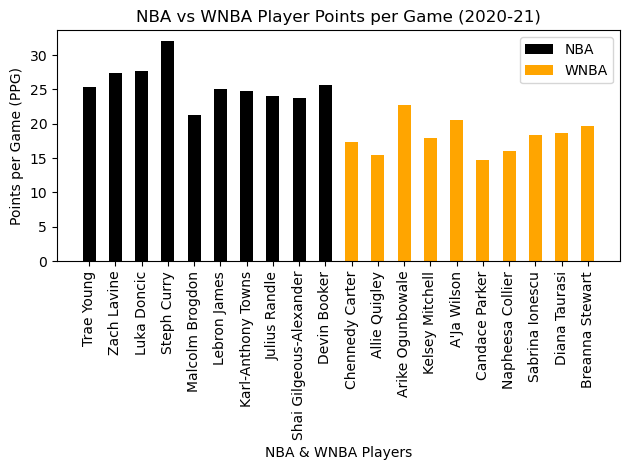

In [76]:
plt.bar(x, y, width = .5, label = "NBA", color = "black")
plt.bar(x2, y2, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Points per Game (PPG)")
plt.title("NBA vs WNBA Player Points per Game (2020-21)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/PPG20-21.png")
plt.tight_layout()
plt.show()

In [25]:
m_stats_21_22 = nba_stats[nba_stats["Year"] == "2021-22"]
w_stats_21_22 = wnba_stats[wnba_stats["Year"] == "2021-22"]

In [26]:
m_stats_21_22.head()

,Year,Teams,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
100,2021-22,Atlanta Hawks,Trae Young,76,34.9,28.4,9.4,20.3,46.0,3.1,8.0,38.2,6.6,7.3,90.4,3.7,9.7,4.0,0.9
101,2021-22,Atlanta Hawks,Clint Capela,73,27.6,11.2,5.0,8.2,61.1,0.0,0.0,0.0,1.1,2.3,47.3,11.9,1.2,0.6,0.8
102,2021-22,Atlanta Hawks,Kevin Huerter,60,31.0,12.9,4.9,10.7,46.3,2.5,5.9,41.3,0.6,0.6,86.8,3.4,2.9,1.2,0.8
103,2021-22,Atlanta Hawks,John Collins,53,30.9,16.4,6.3,12.0,52.8,1.2,3.3,37.0,2.5,3.2,79.6,7.8,1.8,1.1,0.6
104,2021-22,Atlanta Hawks,De'Andre Hunter,52,29.9,13.3,4.8,10.8,44.3,1.4,3.7,37.2,2.4,3.1,75.9,3.4,1.3,1.3,0.7


In [27]:
w_stats_21_22.head()

,Year,Team,Player,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
100,2021-22,Atlanta Dream,Cheyenne Parker,35,26.3,11.9,4.9,9.9,50.0,0.3,1.5,22.2,1.7,2.1,78.4,6.2,2.0,1.9,1.1
101,2021-22,Atlanta Dream,Rhyne Howard,34,31.3,16.2,5.4,15.0,36.1,2.5,7.3,34.3,2.9,3.7,79.2,4.5,2.8,1.6,1.6
102,2021-22,Atlanta Dream,Erica Wheeler,30,26.3,8.4,3.3,9.2,35.5,0.8,2.4,32.9,1.0,1.4,75.6,3.1,3.9,2.5,1.1
103,2021-22,Atlanta Dream,Kristy Wallace,18,24.8,8.2,3.0,6.8,43.9,1.1,2.8,37.3,1.2,1.6,72.4,2.7,2.3,1.8,0.8
104,2021-22,Atlanta Dream,Nia Coffey,16,21.0,6.4,2.2,6.3,34.7,0.6,1.9,29.0,1.4,1.9,74.2,5.2,0.8,2.2,0.6


In [28]:
mp3 = m_stats_21_22.groupby(["Teams", "Player"])["PTS"].max()
mp3 = mp3.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
mp3

,Teams,Player,PTS
0,Atlanta Hawks,Trae Young,28.4
1,Chicago Bulls,DeMar DeRozan,27.9
2,Dallas Mavericks,Luka Doncic,28.4
3,Golden State Warriors,Stephen Curry,25.5
4,Indiana Pacers,Malcolm Brogdon,19.1
5,Los Angeles Lakers,LeBron James,30.3
6,Minnesota Timberwolves,Karl-Anthony Towns,24.6
7,New York Knicks,Julius Randle,20.1
8,Oklahoma City Thunder,Shai Gilgeous-Alexander,24.5
9,Phoenix Suns,Devin Booker,26.8


In [29]:
wp3 = w_stats_21_22.groupby(["Team", "Player"])["PTS"].max()
wp3 = wp3.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wp3

,Team,Player,PTS
0,Atlanta Dream,Rhyne Howard,16.2
1,Chicago Sky,Kahleah Copper,15.7
2,Dallas Wings,Arike Ogunbowale,19.7
3,Indiana Fever,Kelsey Mitchell,18.4
4,Las Vegas Aces,Nneka Ogwumike,18.1
5,Los Angeles Sparks,Kelsey Plum,20.2
6,Minnesota Lynx,Aerial Powers,14.5
7,New York Liberty,Sabrina Ionescu,17.4
8,Phoenix Mercury,Skylar Diggins-Smith,19.7
9,Seattle Storm,Breanna Stewart,21.8


In [30]:
x3 = mp3["Player"]
y3= mp3["PTS"]
x4 = wp3["Player"]
y4 = wp3["PTS"]

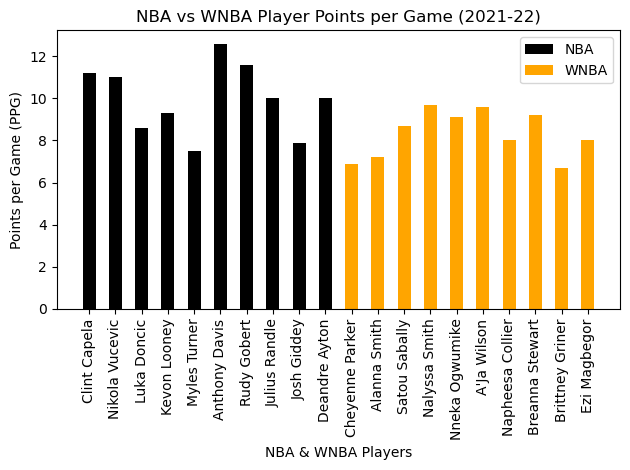

In [77]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Points per Game (PPG)")
plt.title("NBA vs WNBA Player Points per Game (2021-22)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/PPG21-22.png")
plt.tight_layout()
plt.show()

In [32]:
ma = m_stats_21_22.groupby(["Teams", "Player"])["AST"].max()
ma = ma.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
ma

,Teams,Player,AST
0,Atlanta Hawks,Trae Young,9.7
1,Chicago Bulls,Ayo Dosunmu,5.4
2,Dallas Mavericks,Luka Doncic,8.7
3,Golden State Warriors,Draymond Green,7.1
4,Indiana Pacers,Tyrese Haliburton,8.2
5,Los Angeles Lakers,Russell Westbrook,7.1
6,Minnesota Timberwolves,D'Angelo Russell,7.1
7,New York Knicks,Julius Randle,5.1
8,Oklahoma City Thunder,Josh Giddey,6.4
9,Phoenix Suns,Devin Booker,4.8


In [33]:
wa = w_stats_21_22.groupby(["Team", "Player"])["AST"].max()
wa = wa.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wa

,Team,Player,AST
0,Atlanta Dream,Erica Wheeler,3.9
1,Chicago Sky,Courtney Vandersloot,6.5
2,Dallas Wings,Marina Mabrey,3.8
3,Indiana Fever,Kelsey Mitchell,4.2
4,Las Vegas Aces,Jordin Canada,5.8
5,Los Angeles Sparks,Chelsea Gray,6.1
6,Minnesota Lynx,Moriah Jefferson,4.9
7,New York Liberty,Sabrina Ionescu,6.3
8,Phoenix Mercury,Skylar Diggins-Smith,5.5
9,Seattle Storm,Sue Bird,6.0


In [34]:
x3 = ma["Player"]
y3= ma["AST"]
x4 = wa["Player"]
y4 = wa["AST"]

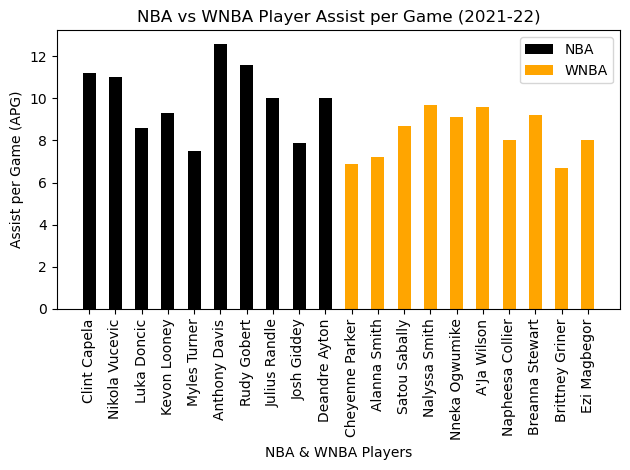

In [78]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Assist per Game (APG)")
plt.title("NBA vs WNBA Player Assist per Game (2021-22)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/AST21-22.png")
plt.tight_layout()
plt.show()

In [36]:
mr = m_stats_21_22.groupby(["Teams", "Player"])["REB"].max()
mr = mr.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
mr

,Teams,Player,REB
0,Atlanta Hawks,Clint Capela,11.9
1,Chicago Bulls,Nikola Vucevic,11.0
2,Dallas Mavericks,Luka Doncic,9.1
3,Golden State Warriors,Draymond Green,7.3
4,Indiana Pacers,Myles Turner,7.1
5,Los Angeles Lakers,Anthony Davis,9.9
6,Minnesota Timberwolves,Karl-Anthony Towns,9.8
7,New York Knicks,Julius Randle,9.9
8,Oklahoma City Thunder,Josh Giddey,7.8
9,Phoenix Suns,JaVale McGee,6.7


In [37]:
wr = w_stats_21_22.groupby(["Team", "Player"])["REB"].max()
wr = wr.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wr

,Team,Player,REB
0,Atlanta Dream,Cheyenne Parker,6.2
1,Chicago Sky,Candace Parker,8.6
2,Dallas Wings,Kayla Thornton,5.9
3,Indiana Fever,Nalyssa Smith,7.9
4,Las Vegas Aces,Nneka Ogwumike,6.6
5,Los Angeles Sparks,A'Ja Wilson,9.4
6,Minnesota Lynx,Sylvia Fowles,9.8
7,New York Liberty,Natasha Howard,7.3
8,Phoenix Mercury,Brianna Turner,6.8
9,Seattle Storm,Tina Charles,7.8


In [38]:
x3 = mr["Player"]
y3= mr["REB"]
x4 = wr["Player"]
y4 = wr["REB"]

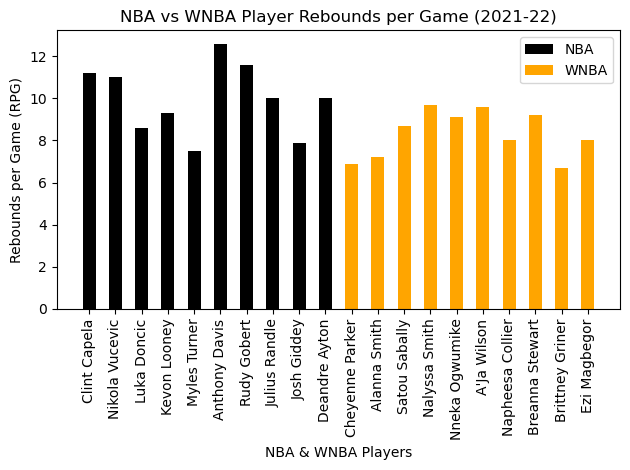

In [79]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Rebounds per Game (RPG)")
plt.title("NBA vs WNBA Player Rebounds per Game (2021-22)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/REB21-22.png")
plt.tight_layout()
plt.show()

In [40]:
m_stats_22_23 = nba_stats[nba_stats["Year"] == "2022-23"]
w_stats_22_23 = wnba_stats[wnba_stats["Year"] == "2022-23"]

In [41]:
mp4 = m_stats_22_23.groupby(["Teams", "Player"])["PTS"].max()
mp4 = mp4.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
mp4

,Teams,Player,PTS
0,Atlanta Hawks,Trae Young,26.2
1,Chicago Bulls,Zach LaVine,24.8
2,Dallas Mavericks,Luka Doncic,32.4
3,Golden State Warriors,Stephen Curry,29.4
4,Indiana Pacers,Tyrese Haliburton,20.7
5,Los Angeles Lakers,LeBron James,29.1
6,Minnesota Timberwolves,Anthony Edwards,24.6
7,New York Knicks,Julius Randle,25.1
8,Oklahoma City Thunder,Shai Gilgeous-Alexander,31.4
9,Phoenix Suns,Devin Booker,27.8


In [42]:
wp4 = w_stats_22_23.groupby(["Team", "Player"])["PTS"].max()
wp4 = wp4.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wp4

,Team,Player,PTS
0,Atlanta Dream,Allisha Gray,17.7
1,Chicago Sky,Kahleah Copper,19.4
2,Dallas Wings,Arike Ogunbowale,20.8
3,Indiana Fever,Kelsey Mitchell,16.7
4,Las Vegas Aces,Nneka Ogwumike,19.8
5,Los Angeles Sparks,A'Ja Wilson,20.5
6,Minnesota Lynx,Napheesa Collier,21.9
7,New York Liberty,Breanna Stewart,22.7
8,Phoenix Mercury,Brittney Griner,18.0
9,Seattle Storm,Jewell Loyd,24.3


In [83]:
x3 = mp4["Player"]
y3= mp4["PTS"]
x4 = wp4["Player"]
y4 = wp4["PTS"]

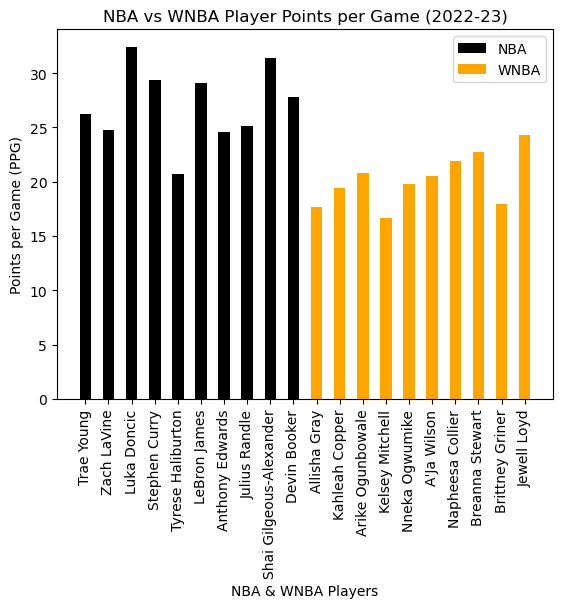

In [85]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Points per Game (PPG)")
plt.title("NBA vs WNBA Player Points per Game (2022-23)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/PPG22-23.png")
plt.show()

In [45]:
ma2 = m_stats_22_23.groupby(["Teams", "Player"])["AST"].max()
ma2 = ma2.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
ma2

,Teams,Player,AST
0,Atlanta Hawks,Trae Young,10.2
1,Chicago Bulls,DeMar DeRozan,5.1
2,Dallas Mavericks,Luka Doncic,8.0
3,Golden State Warriors,Draymond Green,6.8
4,Indiana Pacers,Tyrese Haliburton,10.4
5,Los Angeles Lakers,LeBron James,6.9
6,Minnesota Timberwolves,Mike Conley,6.7
7,New York Knicks,Jalen Brunson,6.2
8,Oklahoma City Thunder,Josh Giddey,6.2
9,Phoenix Suns,Chris Paul,8.9


In [46]:
wa2 = w_stats_22_23.groupby(["Team", "Player"])["AST"].max()
wa2 = wa2.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wa2

,Team,Player,AST
0,Atlanta Dream,Allisha Gray,3.4
1,Chicago Sky,Courtney Williams,6.2
2,Dallas Wings,Arike Ogunbowale,4.5
3,Indiana Fever,Erica Wheeler,4.9
4,Las Vegas Aces,Jordin Canada,6.0
5,Los Angeles Sparks,Chelsea Gray,6.8
6,Minnesota Lynx,Lindsay Allen,5.1
7,New York Liberty,Courtney Vandersloot,7.9
8,Phoenix Mercury,Diana Taurasi,4.7
9,Seattle Storm,Ivana Dojkic,3.7


In [47]:
x3 = ma2["Player"]
y3= ma2["AST"]
x4 = wa2["Player"]
y4 = wa2["AST"]

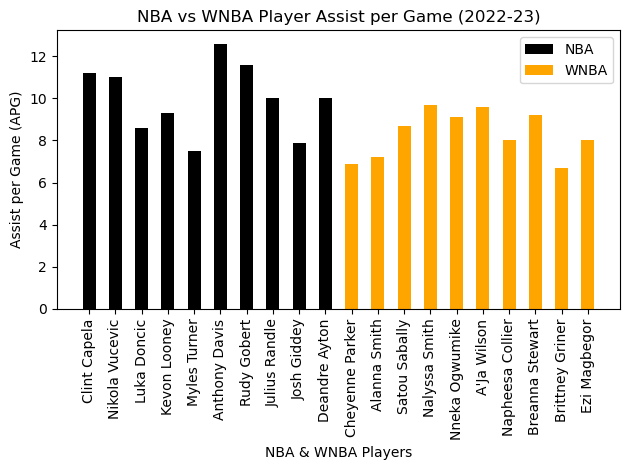

In [81]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Assist per Game (APG)")
plt.title("NBA vs WNBA Player Assist per Game (2022-23)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/AST22-23.png")
plt.tight_layout()
plt.show()

In [49]:
mr2 = m_stats_22_23.groupby(["Teams", "Player"])["REB"].max()
mr2 = mr2.groupby(level=0 , group_keys=False).nlargest(1).reset_index()
mr2

,Teams,Player,REB
0,Atlanta Hawks,Clint Capela,11.2
1,Chicago Bulls,Nikola Vucevic,11.0
2,Dallas Mavericks,Luka Doncic,8.6
3,Golden State Warriors,Kevon Looney,9.3
4,Indiana Pacers,Myles Turner,7.5
5,Los Angeles Lakers,Anthony Davis,12.6
6,Minnesota Timberwolves,Rudy Gobert,11.6
7,New York Knicks,Julius Randle,10.0
8,Oklahoma City Thunder,Josh Giddey,7.9
9,Phoenix Suns,Deandre Ayton,10.0


In [50]:
wr2 = w_stats_22_23.groupby(["Team", "Player"])["REB"].max()
wr2 = wr2.groupby(level = 0, group_keys = False).nlargest(1).reset_index()
wr2

,Team,Player,REB
0,Atlanta Dream,Cheyenne Parker,6.9
1,Chicago Sky,Alanna Smith,7.2
2,Dallas Wings,Satou Sabally,8.7
3,Indiana Fever,Nalyssa Smith,9.7
4,Las Vegas Aces,Nneka Ogwumike,9.1
5,Los Angeles Sparks,A'Ja Wilson,9.6
6,Minnesota Lynx,Napheesa Collier,8.0
7,New York Liberty,Breanna Stewart,9.2
8,Phoenix Mercury,Brittney Griner,6.7
9,Seattle Storm,Ezi Magbegor,8.0


In [51]:
x3 = mr2["Player"]
y3= mr2["REB"]
x4 = wr2["Player"]
y4 = wr2["REB"]

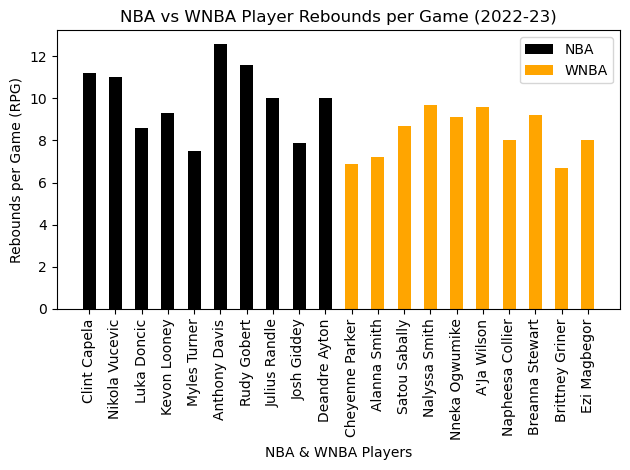

In [82]:
plt.bar(x3, y3, width = .5, label = "NBA", color = "black")
plt.bar(x4, y4, width = .5, label = "WNBA", color = "orange")
plt.xlabel("NBA & WNBA Players")
plt.ylabel("Rebounds per Game (RPG)")
plt.title("NBA vs WNBA Player Rebounds per Game (2022-23)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.savefig("graph_outputs/REB22-23.png")
plt.tight_layout()
plt.show()

In [53]:
nba_all = nba_team_stats.groupby(["Season", "Team"])["PTS", "REB", "AST"].mean()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/3475523630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nba_all = nba_team_stats.groupby(["Season", "Team"])["PTS", "REB", "AST"].mean()


In [54]:
wnba_all = wnba_team_stats.groupby(["Season", "Team"])["PTS", "REB", "AST"].mean()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/3920881791.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wnba_all = wnba_team_stats.groupby(["Season", "Team"])["PTS", "REB", "AST"].mean()


In [55]:
nba_stats_all = nba_team_stats.groupby(["Season"])["Team", "PTS"].mean()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/1929807522.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nba_stats_all = nba_team_stats.groupby(["Season"])["Team", "PTS"].mean()
/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/1929807522.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_stats_all = nba_team_stats.groupby(["Season"])["Team", "PTS"].mean()


In [56]:
nba_stats_all

,PTS
Season,
2019-20,110.78
2020-21,111.47
2021-22,110.90
2022-23,116.10


In [57]:
wnba_stats_all = wnba_team_stats.groupby(["Season"])["Team", "PTS"].mean()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/2708828783.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wnba_stats_all = wnba_team_stats.groupby(["Season"])["Team", "PTS"].mean()
/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/2708828783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wnba_stats_all = wnba_team_stats.groupby(["Season"])["Team", "PTS"].mean()


In [58]:
wnba_stats_all

,PTS
Season,
2019-20,77.44
2020-21,83.63
2021-22,80.86
2022-23,82.11


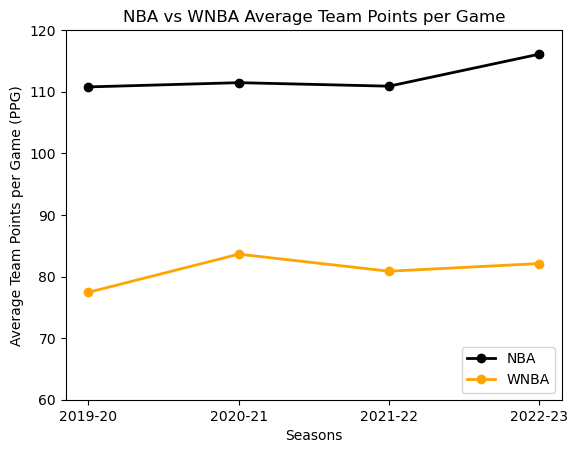

In [59]:
plt.plot(nba_stats_all, marker = "o", label = "NBA", color = "black", linewidth = 2)
plt.plot(wnba_stats_all, marker = "o", label = "WNBA", color = "orange", linewidth = 2)
plt.xlabel("Seasons")
plt.ylabel("Average Team Points per Game (PPG)")
plt.title("NBA vs WNBA Average Team Points per Game")
plt.legend(loc = "lower right")
plt.ylim(60,120)
plt.savefig("graph_outputs/Team_PPG.png")
plt.show()

In [60]:
nba_all = nba_team_stats.groupby(["Season"])["REB", "STL"].mean().reset_index()
nba_all

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/3863725216.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nba_all = nba_team_stats.groupby(["Season"])["REB", "STL"].mean().reset_index()


,Season,REB,STL
0,2019-20,44.11,7.97
1,2020-21,44.09,7.45
2,2021-22,44.39,7.65
3,2022-23,43.38,7.23


In [61]:
wnba_all = wnba_team_stats.groupby(["Season"])["REB", "STL"].mean().reset_index()
wnba_all

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/2724585007.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wnba_all = wnba_team_stats.groupby(["Season"])["REB", "STL"].mean().reset_index()


,Season,REB,STL
0,2019-20,34.76,7.29
1,2020-21,34.23,7.60
2,2021-22,34.75,6.94
3,2022-23,33.90,7.36


In [62]:
wnba_ast = wnba_team_stats.groupby(["Season"])["AST"].mean().reset_index()

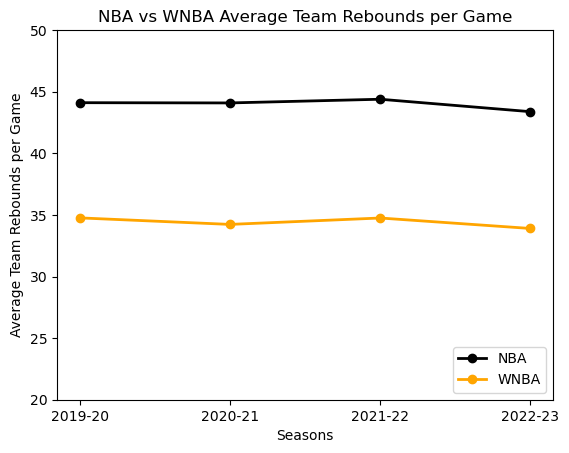

In [63]:
plt.plot(nba_all["Season"], nba_all["REB"], marker = "o", label = "NBA", color = "black", linewidth = 2)
plt.plot(nba_all["Season"], wnba_all["REB"], marker = "o", label = "WNBA", color = "orange", linewidth = 2)
plt.xlabel("Seasons")
plt.ylabel("Average Team Rebounds per Game")
plt.title("NBA vs WNBA Average Team Rebounds per Game")
plt.legend(loc = "lower right")
plt.ylim(20,50)
plt.savefig("graph_outputs/Team_REB.png")
plt.show()

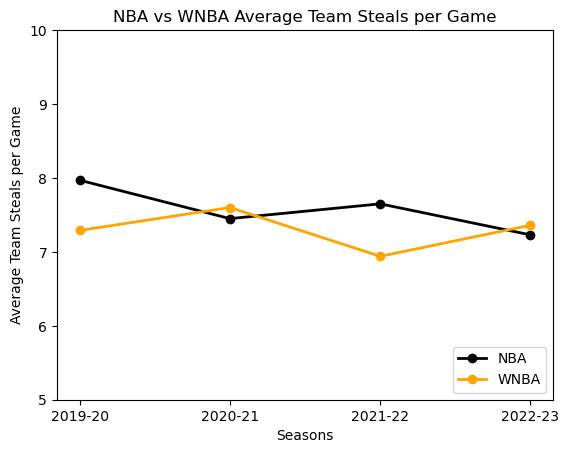

In [64]:
plt.plot(nba_all["Season"], nba_all["STL"], marker = "o", label = "NBA", color = "black", linewidth = 2)
plt.plot(nba_all["Season"], wnba_all["STL"], marker = "o", label = "WNBA", color = "orange", linewidth = 2)
plt.xlabel("Seasons")
plt.ylabel("Average Team Steals per Game")
plt.title("NBA vs WNBA Average Team Steals per Game")
plt.legend(loc = "lower right")
plt.ylim(5,10)
plt.savefig("graph_outputs/Team_STL.png")
plt.show()

In [65]:
nba_team_stats

,Season,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Hawks,67,48.6,111.8,40.6,90.6,44.9,12.0,36.1,33.3,18.5,23.4,79.0,43.3,24.0,16.2,7.8
1,2019-20,Chicago Bulls,65,48.2,106.8,39.6,88.6,44.7,12.2,35.1,34.8,15.5,20.5,75.5,41.9,23.2,15.5,10.0
2,2019-20,Dallas Mavericks,75,48.5,117.0,41.7,90.3,46.1,15.1,41.3,36.7,18.6,23.8,77.9,46.9,24.7,12.7,6.1
3,2019-20,Golden State Warriors,65,48.4,106.3,38.6,88.2,43.8,10.4,31.3,33.4,18.7,23.2,80.3,42.8,25.6,14.9,8.2
4,2019-20,Indiana Pacers,73,48.3,109.4,42.1,88.5,47.6,10.2,28.0,36.3,15.0,19.1,78.7,42.8,25.9,13.2,7.4
5,2019-20,Los Angeles Lakers,71,48.1,113.4,42.3,88.3,48.0,11.0,31.6,34.9,17.7,24.3,72.9,45.7,25.4,15.2,8.6
6,2019-20,Minnesota Timberwolves,64,48.6,113.3,40.4,91.6,44.1,13.3,39.7,33.6,19.1,25.4,75.3,44.8,23.8,15.3,8.7
7,2019-20,New York Knicks,66,48.4,105.8,40.0,89.3,44.7,9.6,28.4,33.7,16.3,23.5,69.4,46.5,22.1,14.3,7.6
8,2019-20,Oklahoma City Thunder,72,48.4,110.4,40.0,85.5,46.8,10.7,30.2,35.5,19.8,24.8,79.6,42.9,21.7,13.7,7.6
9,2019-20,Phoenix Suns,73,48.2,113.6,41.2,88.1,46.8,11.4,31.8,35.8,19.9,23.8,83.4,43.5,27.2,14.8,7.7


In [66]:
nba_ = nba_team_stats.groupby(["Season"])["FG%", "3P%", "FT%"].mean().reset_index()
nba_

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/4188255969.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nba_ = nba_team_stats.groupby(["Season"])["FG%", "3P%", "FT%"].mean().reset_index()


,Season,FG%,3P%,FT%
0,2019-20,45.75,34.80,77.20
1,2020-21,46.63,36.57,78.01
2,2021-22,46.21,35.50,77.40
3,2022-23,47.70,36.31,78.59


In [67]:
wnba_team_stats

,Season,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2019-20,Atlanta Dream,34,40.1,71.2,25.6,69.2,37.1,6.4,22.0,29.0,13.5,18.0,75.2,36.1,15.7,14.4,6.6
1,2019-20,Chicago Sky,34,40.1,84.6,31.4,70.0,44.8,7.3,21.6,33.6,14.6,17.9,81.9,36.4,21.6,15.3,6.8
2,2019-20,Dallas Wings,34,40.0,71.6,25.9,66.6,38.9,6.4,19.5,32.6,13.5,16.6,81.1,33.9,15.2,14.6,7.3
3,2019-20,Indiana Fever,34,40.3,77.6,29.0,68.6,42.2,5.8,16.7,34.6,13.9,17.4,79.4,35.1,17.3,13.9,6.3
4,2019-20,Los Angeles Sparks,34,40.1,80.1,30.3,70.2,43.2,7.1,20.9,34.1,12.3,14.7,83.8,34.2,18.6,14.4,8.2
5,2019-20,Las Vegas Aces,34,40.3,82.2,30.0,70.3,42.7,5.5,15.0,36.7,16.7,21.5,77.7,38.8,20.9,14.6,7.1
6,2019-20,Minnesota Lynx,34,40.0,78.4,30.3,67.1,45.1,5.8,17.5,33.2,12.1,15.4,78.1,34.0,20.3,16.2,8.4
7,2019-20,New York Liberty,34,40.0,77.4,28.7,69.4,41.4,6.5,19.6,33.4,13.4,17.0,78.8,34.6,19.6,15.4,6.8
8,2019-20,Phoenix Mercury,34,40.1,76.5,27.2,64.2,42.4,6.6,20.2,32.5,15.5,18.4,84.6,32.5,17.9,13.2,5.9
9,2019-20,Seattle Storm,34,40.0,74.8,27.8,66.2,42.0,7.1,21.1,33.6,12.1,15.2,79.2,32.0,17.7,15.7,9.5


In [68]:
wnba_ = wnba_team_stats.groupby(["Season"])["FG%", "3P%", "FT%"].mean().reset_index()
wnba_

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/1120268521.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wnba_ = wnba_team_stats.groupby(["Season"])["FG%", "3P%", "FT%"].mean().reset_index()


,Season,FG%,3P%,FT%
0,2019-20,41.98,33.33,79.98
1,2020-21,44.95,35.32,80.99
2,2021-22,43.62,34.28,80.66
3,2022-23,44.03,34.47,79.68


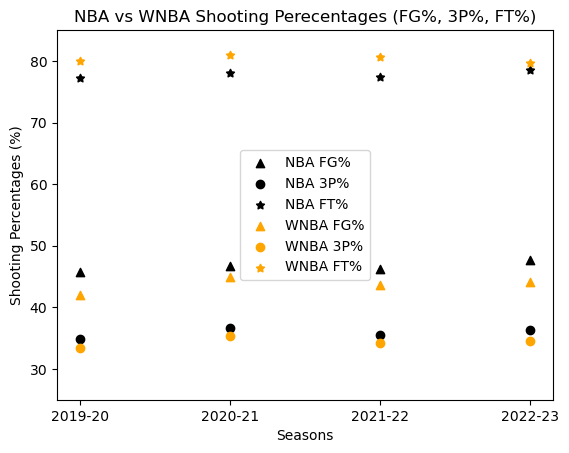

In [69]:
plt.scatter(nba_["Season"], nba_["FG%"], marker = "^", color = "black", label = "NBA FG%")
plt.scatter(nba_["Season"], nba_["3P%"], marker = "o", color = "black", label = "NBA 3P%")
plt.scatter(nba_["Season"], nba_["FT%"], marker = (5,1), color = "black", label = "NBA FT%")
plt.scatter(wnba_["Season"], wnba_["FG%"], marker = "^", color = "orange", label = "WNBA FG%")
plt.scatter(wnba_["Season"], wnba_["3P%"], marker = "o", color = "orange", label = "WNBA 3P%")
plt.scatter(wnba_["Season"], wnba_["FT%"], marker = (5,1), color = "orange", label = "WNBA FT%")
plt.title("NBA vs WNBA Shooting Perecentages (FG%, 3P%, FT%)")
plt.xlabel("Seasons")
plt.ylabel("Shooting Percentages (%)")
plt.ylim(25,85)
plt.legend(loc = "center")
plt.savefig("graph_outputs/team_shooting_percent.png")
plt.show()

In [70]:
n_ = nba_team_stats.groupby(["Season"])["AST", "TOV"].mean().reset_index()
w_ = wnba_team_stats.groupby(["Season"])["AST", "TOV"].mean().reset_index()

/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/158328641.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  n_ = nba_team_stats.groupby(["Season"])["AST", "TOV"].mean().reset_index()
/var/folders/jq/v09bhc5d2111vbxp7qgxxq4m0000gn/T/ipykernel_4588/158328641.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  w_ = wnba_team_stats.groupby(["Season"])["AST", "TOV"].mean().reset_index()


In [71]:
n_

,Season,AST,TOV
0,2019-20,24.36,14.58
1,2020-21,24.96,13.99
2,2021-22,24.56,13.55
3,2022-23,25.53,13.86


In [72]:
w_

,Season,AST,TOV
0,2019-20,18.48,14.77
1,2020-21,19.13,14.76
2,2021-22,19.02,13.90
3,2022-23,20.16,14.61


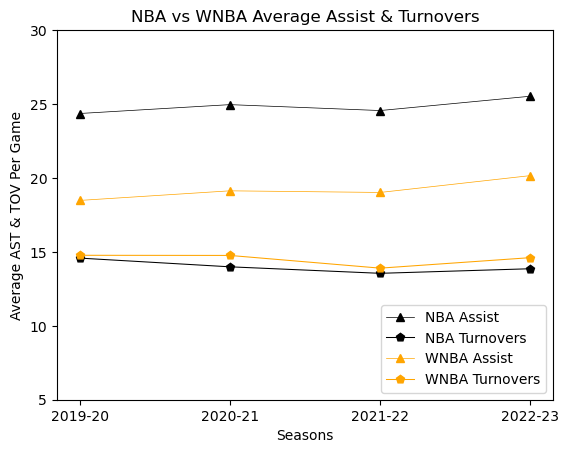

In [73]:
plt.plot(n_["Season"], n_["AST"], marker = "^", color = "black", label = "NBA Assist", linewidth = .5)
plt.plot(n_["Season"], n_["TOV"], marker = (5,0), color = "black", label = "NBA Turnovers", linewidth = .75)
plt.plot(w_["Season"], w_["AST"], marker = "^", color = "orange", label = "WNBA Assist", linewidth = .5)
plt.plot(w_["Season"], w_["TOV"], marker = (5,0), color = "orange", label = "WNBA Turnovers", linewidth = .75)
plt.title("NBA vs WNBA Average Assist & Turnovers")
plt.xlabel("Seasons")
plt.ylabel("Average AST & TOV Per Game")
plt.ylim(5,30)
plt.legend(loc = "lower right")
plt.savefig("graph_outputs/team_ast_tov.png")
plt.show()